# Pandas - Dataframe

What is a Pandas DataFrame?

A Pandas DataFrame is a fundamental data structure in the Pandas library. It's a two-dimensional labeled array with columns that can hold different data types (numeric, string, boolean, etc.). Think of it as a table where each column is a Pandas Series (the one-dimensional labeled array we discussed earlier), and all the Series share the same index (row labels).

Key Characteristics of Pandas DataFrames:

* Two-Dimensional: Data is organized in rows and columns, like a table.
* Labeled Rows and Columns: Both rows and columns have labels. Rows have an index (which can be custom labels or a default numerical index), and columns have column names.
* Heterogeneous Data: Each column can contain data of a different type (e.g., one column might be integers, another strings, and another boolean values).
* Mutable Data: You can modify the values within a DataFrame.
* Size-Mutable: You can add or remove columns and rows from a DataFrame (unlike Series, where the size is generally fixed after creation).
* Powerful Indexing and Selection: You can access and manipulate data in various ways using row and column labels, numerical positions, or boolean indexing.
* Alignment by Index and Columns: Operations between DataFrames (or between a DataFrame and a Series) automatically align data based on their row indices and column names.
* Rich Functionality: Pandas provides a vast array of methods for data cleaning, manipulation, analysis, merging, joining, reshaping, and more.


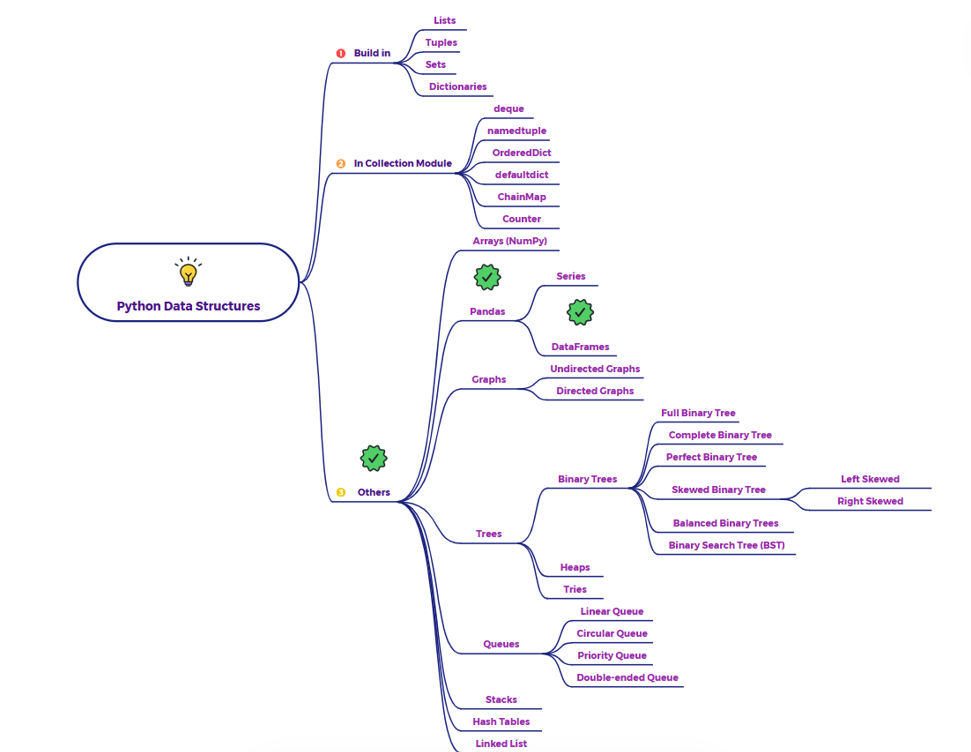

# 1. Define a Utility function to print highlighted characteristics

In [115]:
import pandas as pd
import numpy as np # Often used with pandas for numerical operations

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(f"{description}")
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Pandas DataFrame: Customer Order Management System Example ---")

--- Pandas DataFrame: Customer Order Management System Example ---


In [116]:
# --- Scenario Setup: Initial Order Data ---

data = {
    'OrderID': ['ORD001', 'ORD002', 'ORD003', 'ORD004', 'ORD005'],
    'CustomerID': ['CUST101', 'CUST102', 'CUST101', 'CUST103', 'CUST102'],
    'ProductName': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Laptop'],
    'Quantity': [1, 2, 1, 1, 1],
    'UnitPrice': [1200.00, 25.50, 75.00, 300.00, 1200.00],
    'OrderDate': pd.to_datetime(['2025-05-10', '2025-05-10', '2025-05-11', '2025-05-12', '2025-05-13']),
    'Status': ['Pending', 'Completed', 'Pending', 'Completed', 'Pending']
}

# Create a Pandas DataFrame
orders_df = pd.DataFrame(data)
# Optionally set OrderID as index for easier lookup, but not strictly necessary for characteristics
orders_df = orders_df.set_index('OrderID')

print(f"Initial Orders DataFrame:\n{orders_df}\n")

Initial Orders DataFrame:
        CustomerID ProductName  Quantity  UnitPrice  OrderDate     Status
OrderID                                                                  
ORD001     CUST101      Laptop         1     1200.0 2025-05-10    Pending
ORD002     CUST102       Mouse         2       25.5 2025-05-10  Completed
ORD003     CUST101    Keyboard         1       75.0 2025-05-11    Pending
ORD004     CUST103     Monitor         1      300.0 2025-05-12  Completed
ORD005     CUST102      Laptop         1     1200.0 2025-05-13    Pending



# 2. Two-Dimensional:

* The orders_df is created with rows and columns, representing a table.
* orders_df.shape returns (5, 6) (before modifications), indicating 5 rows and 6 columns.
* orders_df.ndim explicitly confirms it's a 2-dimensional structure.

In [117]:
# 1. Two-Dimensional Characteristic

highlight_characteristic(
    "Two-Dimensional",
    "A Pandas DataFrame is a two-dimensional labeled data structure with columns that can be of different types. It's like a spreadsheet or a SQL table."
)

print(f"Shape of the DataFrame: {orders_df.shape} (5 rows, 6 columns)")
print(f"Number of dimensions: {orders_df.ndim}") # 2 dimensions
print("It provides a tabular view of data, with rows and columns.\n")


===== TWO-DIMENSIONAL =====
A Pandas DataFrame is a two-dimensional labeled data structure with columns that can be of different types. It's like a spreadsheet or a SQL table.
===== TWO-DIMENSIONAL =====

Shape of the DataFrame: (5, 6) (5 rows, 6 columns)
Number of dimensions: 2
It provides a tabular view of data, with rows and columns.



# 3. Labeled Rows and Columns:

* Rows are labeled by OrderID (set as index).
* Columns have explicit names like CustomerID, ProductName, Quantity, etc.
* Data is accessed intuitively using these labels: orders_df['ProductName'] for a column, orders_df.loc['ORD002'] for a row, and orders_df.loc['ORD003', 'Quantity'] for a specific cell.

In [118]:
# 2. Labeled Rows and Columns Characteristic

highlight_characteristic(
    "Labeled Rows and Columns",
    "Both rows (index) and columns have labels (names), allowing for intuitive data access and manipulation."
)

print(f"Row Labels (Index):\n{orders_df.index}")
print(f"\nColumn Labels:\n{orders_df.columns}")

print("\nAccessing a column by label:")
print(f"Product Names:\n{orders_df['ProductName']}\n")

print("Accessing a row by label (using .loc):")
print(f"Details for OrderID 'ORD002':\n{orders_df.loc['ORD002']}\n")

print("Accessing specific cell by row and column labels (using .loc):")
print(f"Quantity for ORD003: {orders_df.loc['ORD003', 'Quantity']}\n")


===== LABELED ROWS AND COLUMNS =====
Both rows (index) and columns have labels (names), allowing for intuitive data access and manipulation.
===== LABELED ROWS AND COLUMNS =====

Row Labels (Index):
Index(['ORD001', 'ORD002', 'ORD003', 'ORD004', 'ORD005'], dtype='object', name='OrderID')

Column Labels:
Index(['CustomerID', 'ProductName', 'Quantity', 'UnitPrice', 'OrderDate',
       'Status'],
      dtype='object')

Accessing a column by label:
Product Names:
OrderID
ORD001      Laptop
ORD002       Mouse
ORD003    Keyboard
ORD004     Monitor
ORD005      Laptop
Name: ProductName, dtype: object

Accessing a row by label (using .loc):
Details for OrderID 'ORD002':
CustomerID                 CUST102
ProductName                  Mouse
Quantity                         2
UnitPrice                     25.5
OrderDate      2025-05-10 00:00:00
Status                   Completed
Name: ORD002, dtype: object

Accessing specific cell by row and column labels (using .loc):
Quantity for ORD003: 1



# 4. Heterogeneous Data:

* The orders_df.dtypes output shows that different columns have different data types: object (for strings), int64, float64, and datetime64[ns]. This is a core strength of DataFrames, allowing them to model diverse real-world data.

In [119]:
# 3. Heterogeneous Data Characteristic

highlight_characteristic(
    "Heterogeneous Data",
    "Unlike NumPy arrays, different columns in a DataFrame can hold data of different types, which is essential for real-world tabular data."
)

print(f"Data types of each column (dtypes):\n{orders_df.dtypes}\n")
print("Notice how 'CustomerID' and 'ProductName' are objects (strings), 'Quantity' is int64, "
      "'UnitPrice' is float64, and 'OrderDate' is datetime64. This flexibility is key.\n")


===== HETEROGENEOUS DATA =====
Unlike NumPy arrays, different columns in a DataFrame can hold data of different types, which is essential for real-world tabular data.
===== HETEROGENEOUS DATA =====

Data types of each column (dtypes):
CustomerID             object
ProductName            object
Quantity                int64
UnitPrice             float64
OrderDate      datetime64[ns]
Status                 object
dtype: object

Notice how 'CustomerID' and 'ProductName' are objects (strings), 'Quantity' is int64, 'UnitPrice' is float64, and 'OrderDate' is datetime64. This flexibility is key.



# 5. Mutable Data:

* orders_df.loc['ORD001', 'Status'] = 'Shipped' directly changes the value of a specific cell within the existing DataFrame, demonstrating that its content is mutable.

In [120]:
# 4. Mutable Data Characteristic

highlight_characteristic(
    "Mutable Data",
    "The values (data) within DataFrame cells can be changed after creation."
)

print(f"Original Status for ORD001: {orders_df.loc['ORD001', 'Status']}")
orders_df.loc['ORD001', 'Status'] = 'Shipped' # Update a cell value
print(f"Updated Status for ORD001: {orders_df.loc['ORD001', 'Status']}")
print(f"\nDataFrame after data mutation for ORD001:\n{orders_df}\n")


===== MUTABLE DATA =====
The values (data) within DataFrame cells can be changed after creation.
===== MUTABLE DATA =====

Original Status for ORD001: Pending
Updated Status for ORD001: Shipped

DataFrame after data mutation for ORD001:
        CustomerID ProductName  Quantity  UnitPrice  OrderDate     Status
OrderID                                                                  
ORD001     CUST101      Laptop         1     1200.0 2025-05-10    Shipped
ORD002     CUST102       Mouse         2       25.5 2025-05-10  Completed
ORD003     CUST101    Keyboard         1       75.0 2025-05-11    Pending
ORD004     CUST103     Monitor         1      300.0 2025-05-12  Completed
ORD005     CUST102      Laptop         1     1200.0 2025-05-13    Pending



# 6. Size-Mutable:

* Adding a column: orders_df['TotalPrice'] = ... directly adds a new column to the DataFrame.
* Adding a row: pd.concat() is used to add a new row (new_order) to the DataFrame. While pd.concat technically returns a new DataFrame, it's the standard and most efficient way to conceptually "add" rows in Pandas (as DataFrames are built on NumPy arrays which are fixed-size at a lower level).

In [121]:
# 5. Size-Mutable Characteristic
highlight_characteristic(
    "Size-Mutable",
    "DataFrames can have rows and columns added or removed after creation, making them highly flexible for evolving datasets."
)

print(f"Original DataFrame shape: {orders_df.shape}")

# Add a new column (e.g., calculated TotalPrice)
orders_df['TotalPrice'] = orders_df['Quantity'] * orders_df['UnitPrice']
print(f"\nDataFrame after adding 'TotalPrice' column:\n{orders_df}")
print(f"New shape: {orders_df.shape}\n")

# Add a new row (e.g., a new order)
new_order = pd.Series({
    'CustomerID': 'CUST104',
    'ProductName': 'Webcam',
    'Quantity': 1,
    'UnitPrice': 50.00,
    'OrderDate': pd.to_datetime('2025-05-14'),
    'Status': 'Pending',
    'TotalPrice': 50.00 # Calculated manually for this example
}, name='ORD006') # Assign a name to the Series for the new index
orders_df = pd.concat([orders_df, new_order.to_frame().T]) # Concatenate new row
print(f"\nDataFrame after adding 'ORD006' row:\n{orders_df}")
print(f"New shape: {orders_df.shape}\n")

# Remove a column (e.g., 'UnitPrice' if we only need 'TotalPrice')
orders_df = orders_df.drop(columns=['UnitPrice'])
print(f"\nDataFrame after dropping 'UnitPrice' column:\n{orders_df}")
print(f"New shape: {orders_df.shape}\n")

# Remove rows (e.g., orders that are now 'Shipped')
orders_df_cleaned = orders_df.drop(index=orders_df[orders_df['Status'] == 'Shipped'].index)
print(f"\nDataFrame after dropping 'Shipped' orders (ORD001 is gone):\n{orders_df_cleaned}")
print(f"New shape: {orders_df_cleaned.shape}\n")


===== SIZE-MUTABLE =====
DataFrames can have rows and columns added or removed after creation, making them highly flexible for evolving datasets.
===== SIZE-MUTABLE =====

Original DataFrame shape: (5, 6)

DataFrame after adding 'TotalPrice' column:
        CustomerID ProductName  Quantity  UnitPrice  OrderDate     Status  \
OrderID                                                                     
ORD001     CUST101      Laptop         1     1200.0 2025-05-10    Shipped   
ORD002     CUST102       Mouse         2       25.5 2025-05-10  Completed   
ORD003     CUST101    Keyboard         1       75.0 2025-05-11    Pending   
ORD004     CUST103     Monitor         1      300.0 2025-05-12  Completed   
ORD005     CUST102      Laptop         1     1200.0 2025-05-13    Pending   

         TotalPrice  
OrderID              
ORD001       1200.0  
ORD002         51.0  
ORD003         75.0  
ORD004        300.0  
ORD005       1200.0  
New shape: (5, 7)


DataFrame after adding 'ORD006' row

# 7. Powerful Indexing and Selection:

* Column Selection: Selecting one (orders_df['ProductName']) or multiple columns (orders_df[['CustomerID', 'ProductName', 'TotalPrice']]).
* Row Selection:
  * .loc: Label-based indexing for rows (e.g., orders_df.loc['ORD003':'ORD005']).
  * .iloc: Integer-position-based indexing for rows (e.g., orders_df.iloc[1:4]).
* Boolean Indexing: Filtering rows based on complex conditions (e.g., orders_df[orders_df['TotalPrice'] > 1000] or orders_df[(orders_df['ProductName'] == 'Laptop') & (orders_df['Status'] == 'Pending')]).
* Single Cell Access: .at (label-based) and .iat (integer-position-based) for optimized single-value access.

In [122]:
# 6. Powerful Indexing and Selection Characteristic

highlight_characteristic(
    "Powerful Indexing and Selection",
    "DataFrames offer versatile ways to select specific rows, columns, or subsets of data using label-based (.loc), integer-position-based (.iloc), and boolean indexing."
)

# Select multiple columns
selected_cols = orders_df[['CustomerID', 'ProductName', 'TotalPrice']]
print(f"Selected 'CustomerID', 'ProductName', 'TotalPrice' columns:\n{selected_cols}\n")

# Select rows using .loc (label-based slicing, inclusive)
rows_by_label = orders_df.loc['ORD003':'ORD005']
print(f"Rows 'ORD003' to 'ORD005' using .loc:\n{rows_by_label}\n")

# Select rows using .iloc (integer-position-based slicing, exclusive end)
rows_by_position = orders_df.iloc[1:4] # Rows at index 1, 2, 3
print(f"Rows at positions 1 to 3 using .iloc:\n{rows_by_position}\n")

# Boolean indexing (filtering rows based on a condition)
high_value_orders = orders_df[orders_df['TotalPrice'] > 1000]
print(f"High-value orders (TotalPrice > 1000):\n{high_value_orders}\n")

pending_laptops = orders_df[(orders_df['ProductName'] == 'Laptop') & (orders_df['Status'] == 'Pending')]
print(f"Pending 'Laptop' orders:\n{pending_laptops}\n")

# Using .at and .iat for single cell access (optimized)
print(f"Status of ORD002 (using .at): {orders_df.at['ORD002', 'Status']}")
print(f"Quantity of order at position (0, 2) (using .iat): {orders_df.iat[0, 2]}\n")


===== POWERFUL INDEXING AND SELECTION =====
DataFrames offer versatile ways to select specific rows, columns, or subsets of data using label-based (.loc), integer-position-based (.iloc), and boolean indexing.
===== POWERFUL INDEXING AND SELECTION =====

Selected 'CustomerID', 'ProductName', 'TotalPrice' columns:
       CustomerID ProductName TotalPrice
ORD001    CUST101      Laptop     1200.0
ORD002    CUST102       Mouse       51.0
ORD003    CUST101    Keyboard       75.0
ORD004    CUST103     Monitor      300.0
ORD005    CUST102      Laptop     1200.0
ORD006    CUST104      Webcam       50.0

Rows 'ORD003' to 'ORD005' using .loc:
       CustomerID ProductName Quantity            OrderDate     Status  \
ORD003    CUST101    Keyboard        1  2025-05-11 00:00:00    Pending   
ORD004    CUST103     Monitor        1  2025-05-12 00:00:00  Completed   
ORD005    CUST102      Laptop        1  2025-05-13 00:00:00    Pending   

       TotalPrice  
ORD003       75.0  
ORD004      300.0  
OR

# 8. Alignment by Index and Columns:

* When orders_df['TotalPrice_With_Shipping'] = orders_df['TotalPrice'] + shipping_df['ShippingCost'] is performed, Pandas automatically aligns the TotalPrice and ShippingCost values based on their shared OrderID (row index).
* For OrderIDs present in one DataFrame but not the other (e.g., 'ORD007' in shipping_df but not orders_df), the result for those non-matching labels is NaN, ensuring correct aggregation of only aligned data.

In [123]:
# 7. Alignment by Index and Columns Characteristic

highlight_characteristic(
    "Alignment by Index and Columns",
    "Operations between DataFrames automatically align data based on both row and column labels. Non-matching labels will result in NaN, ensuring correct computations even with misaligned data."
)

# Scenario: Additional shipping costs for certain orders/products
shipping_costs_data = {
    'OrderID': ['ORD001', 'ORD003', 'ORD007'], # ORD007 is new
    'ShippingCost': [15.00, 10.00, 20.00]
}
shipping_df = pd.DataFrame(shipping_costs_data).set_index('OrderID')

print(f"Orders DataFrame:\n{orders_df}")
print(f"\nShipping Costs DataFrame:\n{shipping_df}")

# Add ShippingCost to TotalPrice
# Pandas aligns by OrderID (row index) and 'TotalPrice'/'ShippingCost' (column name)
orders_df['TotalPrice_With_Shipping'] = orders_df['TotalPrice'] + shipping_df['ShippingCost']
print(f"\nDataFrame after adding 'TotalPrice_With_Shipping':\n{orders_df}")
print("Note: 'ORD007' is NaN because it's in shipping_df but not orders_df. "
      "'ORD002', 'ORD004', 'ORD005', 'ORD006' are NaN because they are in orders_df but not shipping_df. "
      "ORD001 and ORD003 align perfectly.\n")



===== ALIGNMENT BY INDEX AND COLUMNS =====
Operations between DataFrames automatically align data based on both row and column labels. Non-matching labels will result in NaN, ensuring correct computations even with misaligned data.
===== ALIGNMENT BY INDEX AND COLUMNS =====

Orders DataFrame:
       CustomerID ProductName Quantity            OrderDate     Status  \
ORD001    CUST101      Laptop        1  2025-05-10 00:00:00    Shipped   
ORD002    CUST102       Mouse        2  2025-05-10 00:00:00  Completed   
ORD003    CUST101    Keyboard        1  2025-05-11 00:00:00    Pending   
ORD004    CUST103     Monitor        1  2025-05-12 00:00:00  Completed   
ORD005    CUST102      Laptop        1  2025-05-13 00:00:00    Pending   
ORD006    CUST104      Webcam        1  2025-05-14 00:00:00    Pending   

       TotalPrice  
ORD001     1200.0  
ORD002       51.0  
ORD003       75.0  
ORD004      300.0  
ORD005     1200.0  
ORD006       50.0  

Shipping Costs DataFrame:
         ShippingCo

# 9. Rich Functionality:

* describe(): Provides quick statistical summaries of numerical columns.
* groupby(): Groups data based on one or more columns (CustomerID) and allows aggregation (e.g., sum()).
* sort_values(): Sorts the DataFrame based on specified column(s).
* fillna(): Handles missing data (NaNs) by filling them with a specified value.
* apply(): Applies a custom Python function element-wise or row/column-wise, demonstrating extensibility.

In [124]:
# 8. Rich Functionality Characteristic

highlight_characteristic(
    "Rich Functionality",
    "DataFrames come with a vast array of built-in methods for common data analysis tasks, including statistical summaries, grouping, sorting, handling missing data, and more."
)

print(f"Current DataFrame (before final operations):\n{orders_df}\n")

# Basic descriptive statistics for numerical columns
print(f"Descriptive Statistics for numerical columns:\n{orders_df.describe()}\n")

# Group by CustomerID and calculate total spent
total_spent_by_customer = orders_df.groupby('CustomerID')['TotalPrice'].sum()
print(f"Total spent by Customer:\n{total_spent_by_customer}\n")

# Sort by TotalPrice in descending order
sorted_orders = orders_df.sort_values(by='TotalPrice', ascending=False)
print(f"Orders sorted by TotalPrice (descending):\n{sorted_orders}\n")

# Handle missing data (e.g., fill NaN in TotalPrice_With_Shipping with 0)
orders_df_filled = orders_df.fillna({'TotalPrice_With_Shipping': 0})
print(f"DataFrame with NaN in 'TotalPrice_With_Shipping' filled with 0:\n{orders_df_filled}\n")

# Apply a custom function to a column
def get_product_category(product_name):
    if 'Laptop' in product_name or 'Monitor' in product_name:
        return 'Electronics'
    elif 'Keyboard' in product_name or 'Mouse' in product_name or 'Webcam' in product_name:
        return 'Peripherals'
    else:
        return 'Other'

orders_df['ProductCategory'] = orders_df['ProductName'].apply(get_product_category)
print(f"DataFrame with new 'ProductCategory' column:\n{orders_df}\n")

print("\n--- End of Example ---")


===== RICH FUNCTIONALITY =====
DataFrames come with a vast array of built-in methods for common data analysis tasks, including statistical summaries, grouping, sorting, handling missing data, and more.
===== RICH FUNCTIONALITY =====

Current DataFrame (before final operations):
       CustomerID ProductName Quantity            OrderDate     Status  \
ORD001    CUST101      Laptop        1  2025-05-10 00:00:00    Shipped   
ORD002    CUST102       Mouse        2  2025-05-10 00:00:00  Completed   
ORD003    CUST101    Keyboard        1  2025-05-11 00:00:00    Pending   
ORD004    CUST103     Monitor        1  2025-05-12 00:00:00  Completed   
ORD005    CUST102      Laptop        1  2025-05-13 00:00:00    Pending   
ORD006    CUST104      Webcam        1  2025-05-14 00:00:00    Pending   

       TotalPrice TotalPrice_With_Shipping  
ORD001     1200.0                   1215.0  
ORD002       51.0                      NaN  
ORD003       75.0                     85.0  
ORD004      300.0    

<ipython-input-124-a9e3829a6812>:11: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(f"Descriptive Statistics for numerical columns:\n{orders_df.describe()}\n")
<ipython-input-124-a9e3829a6812>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orders_df_filled = orders_df.fillna({'TotalPrice_With_Shipping': 0})


# COMPLETED